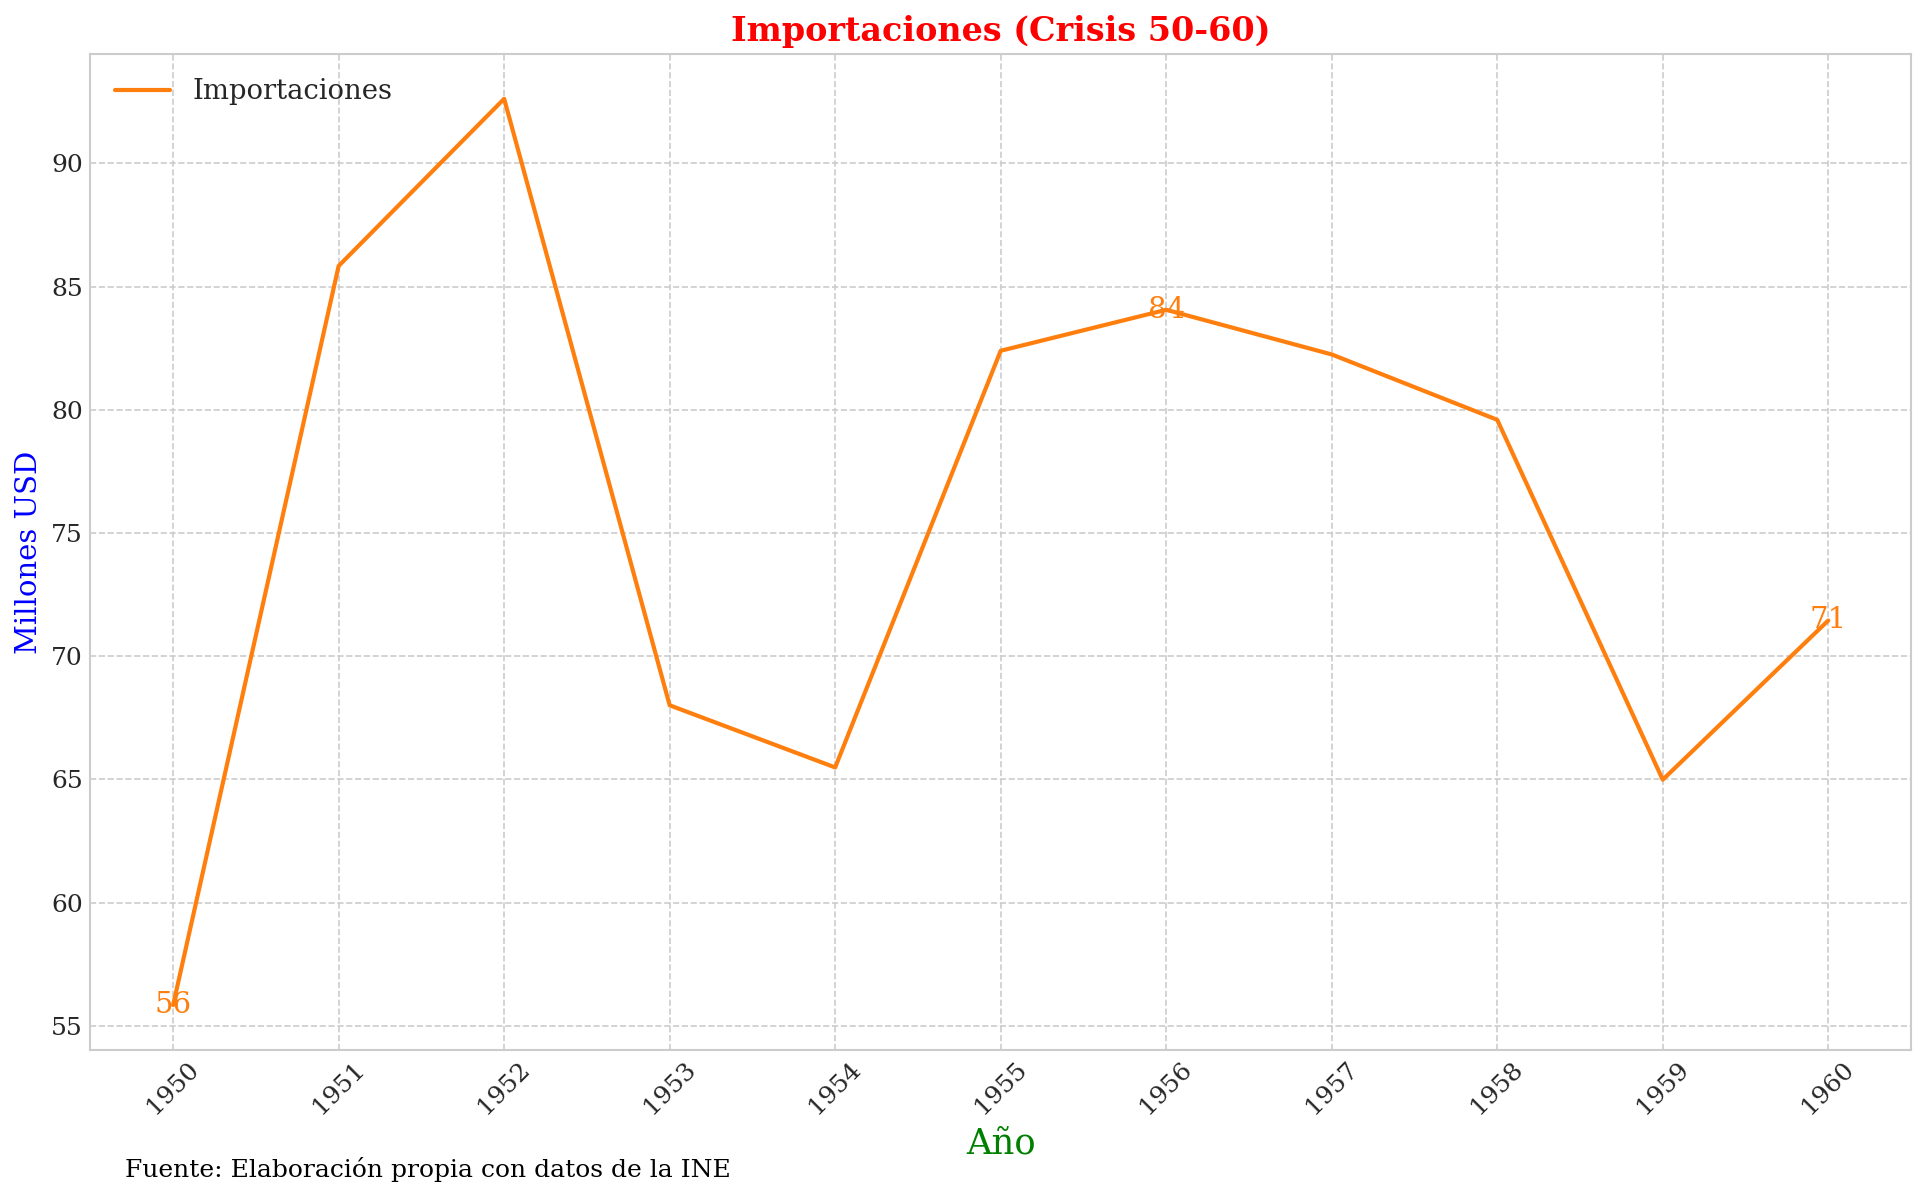

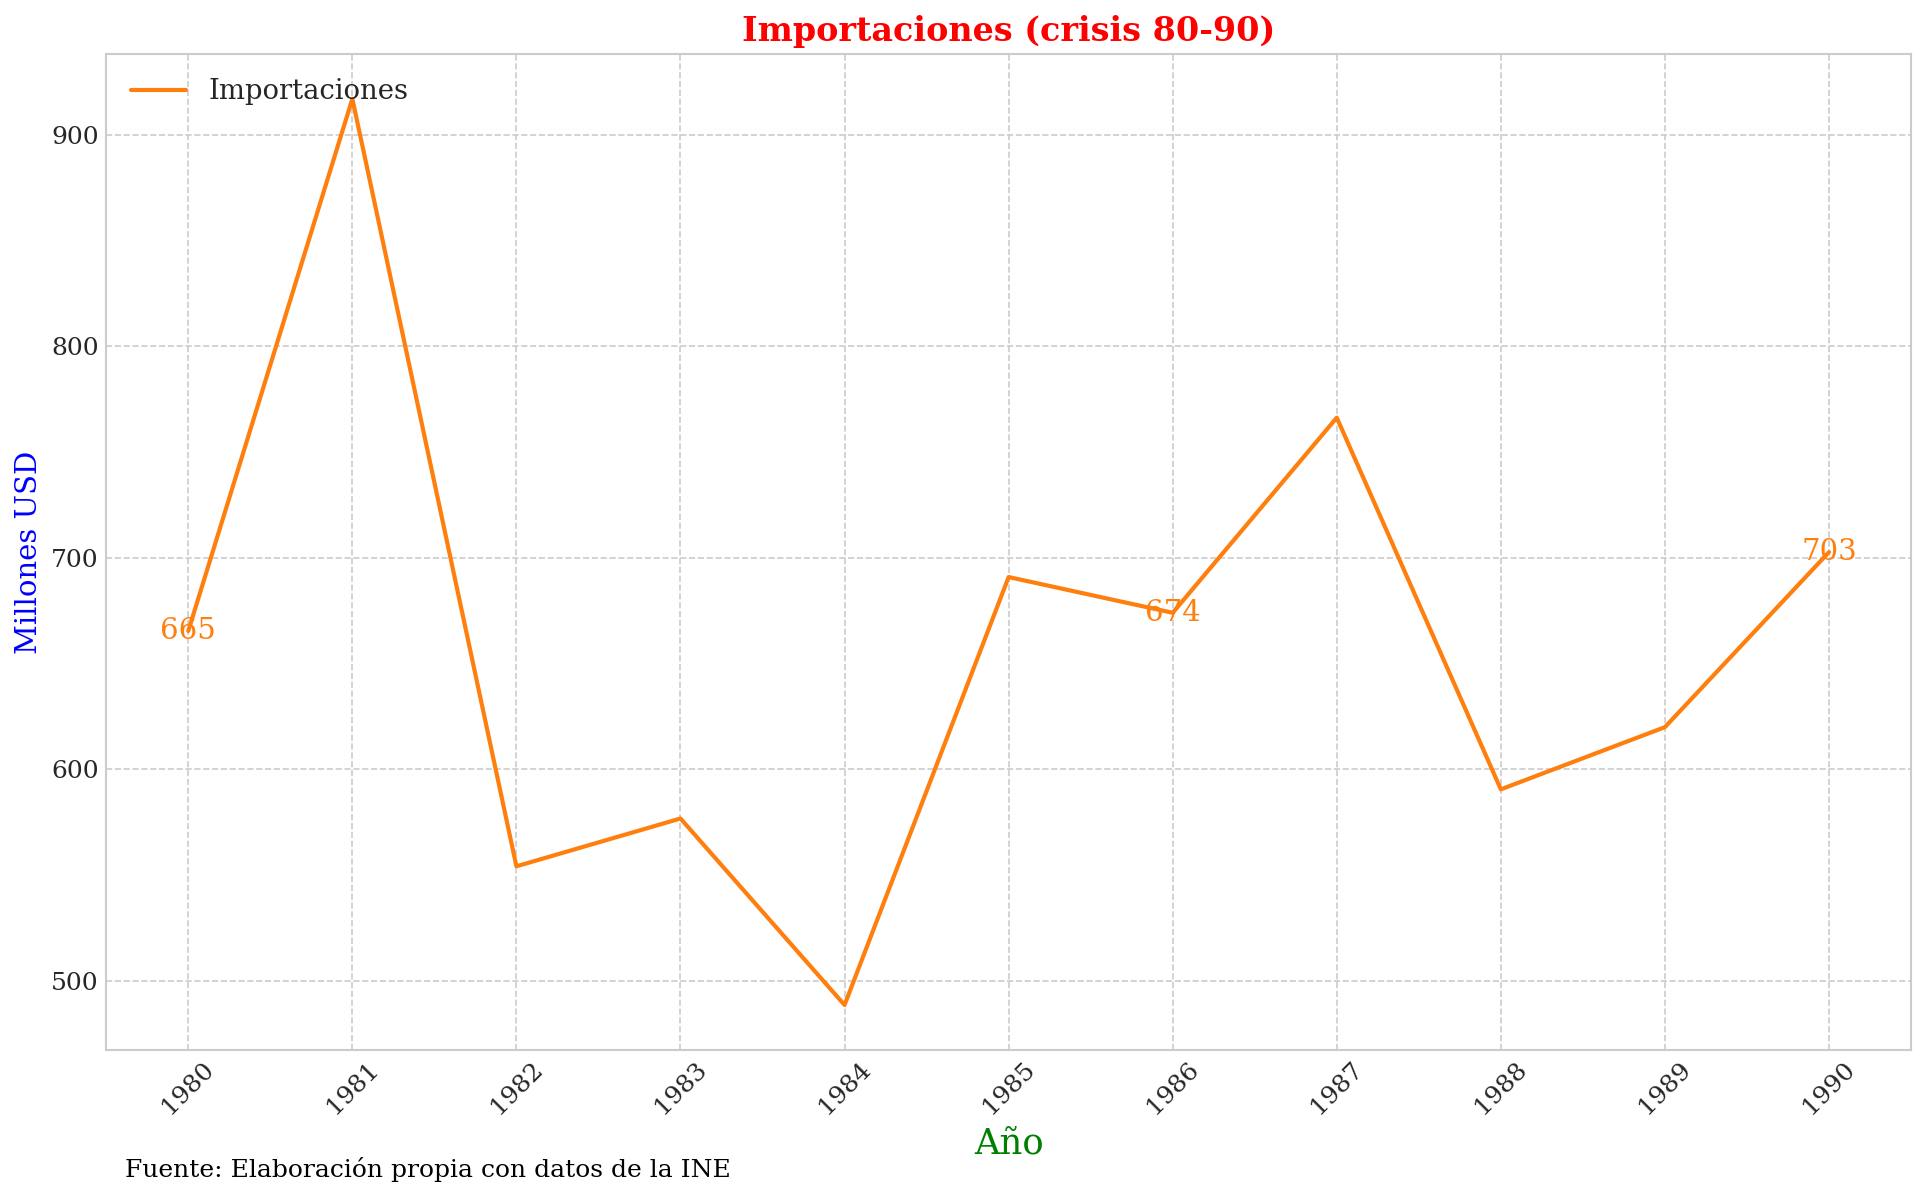

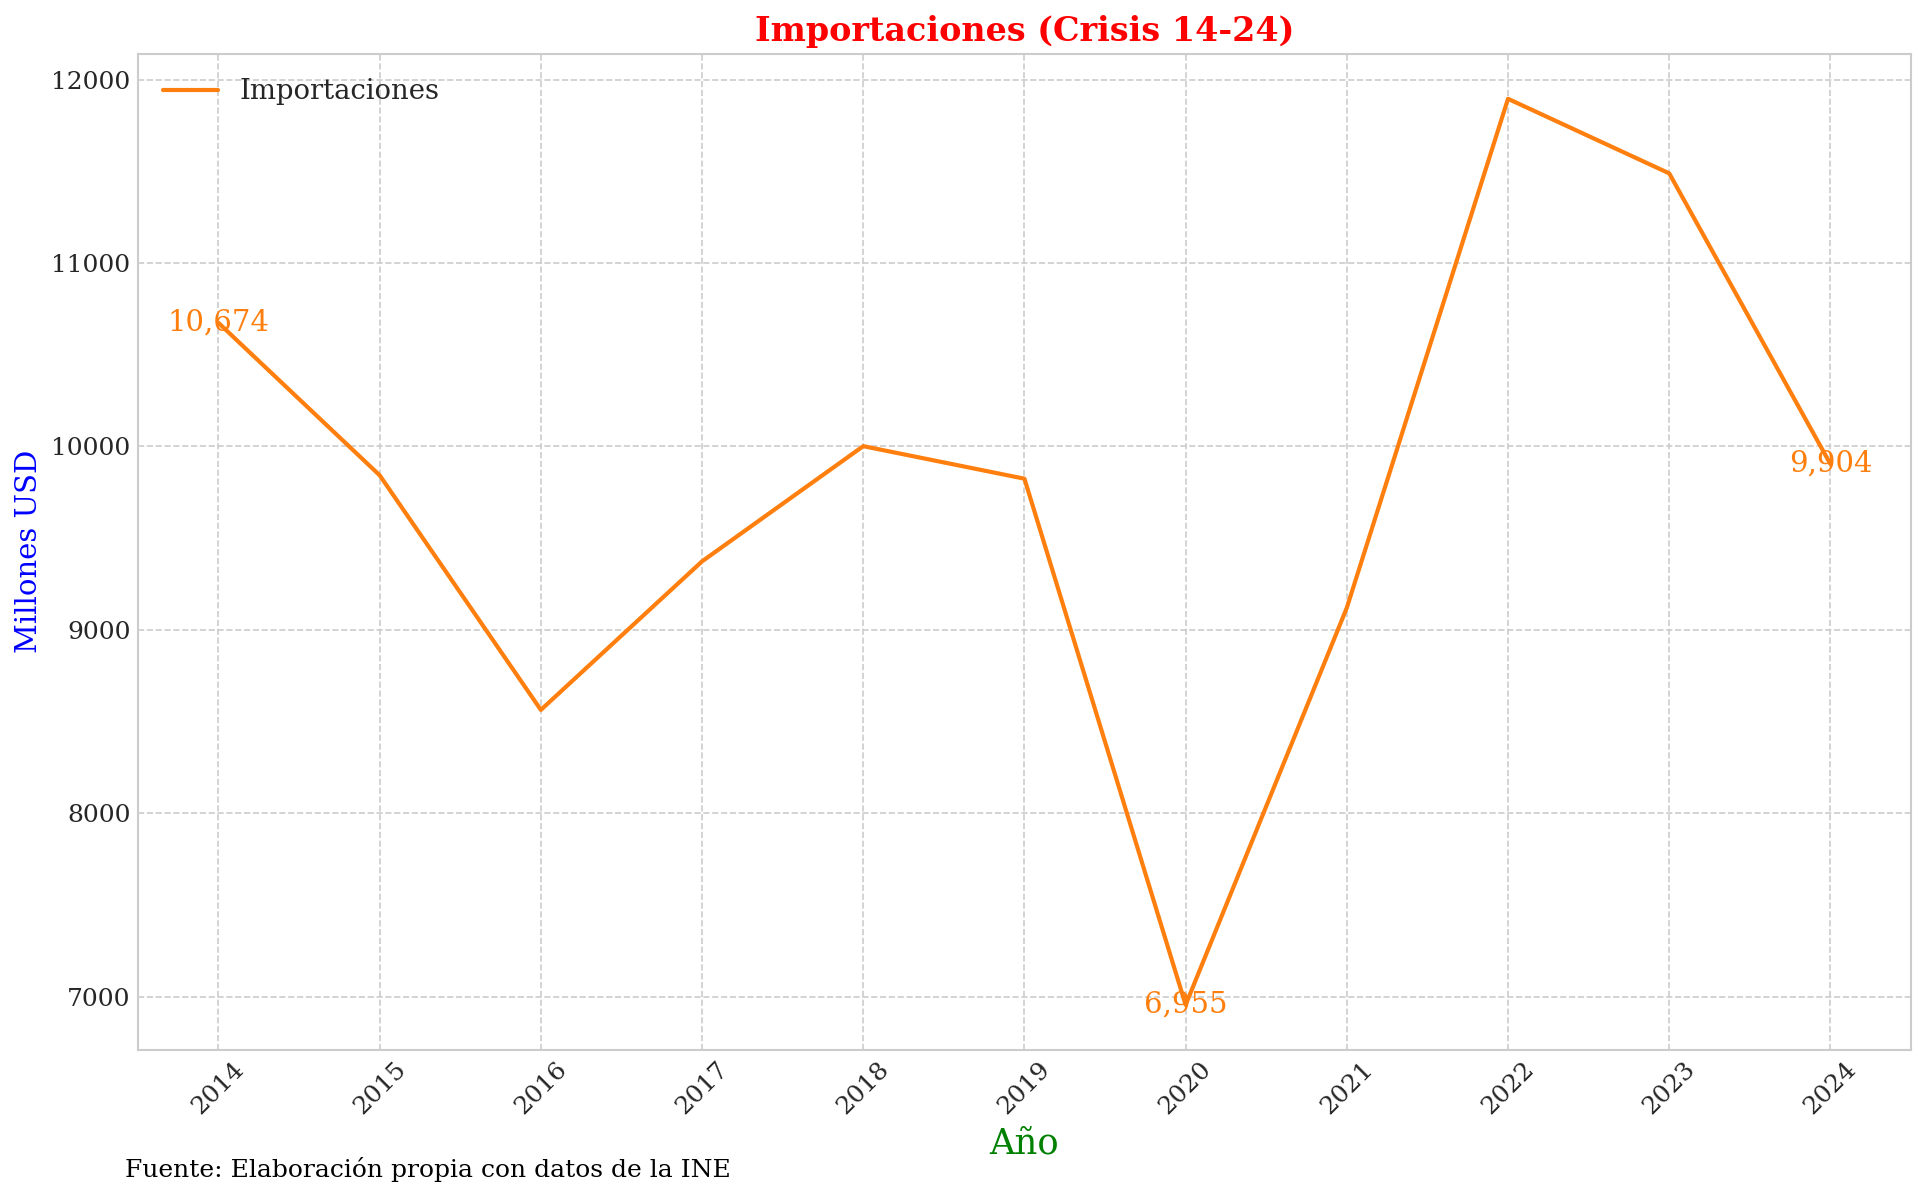

In [4]:
# ─────────────────────────────────────────────────────────────────────
# Importaciones
# ─────────────────────────────────────────────────────────────────────
import sys, os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from func_auxiliares.graficos_utils import (
    get_df, set_style, init_base_plot, add_year_value_annotations, compute_annot_years
)
from func_auxiliares.config import (
    DB_PATH, ASSETS_DIR,
    PERIODOS_PARA_CRISIS
)

# ─────────────────────────────────────────────────────────────────────
# Configuración general
# ─────────────────────────────────────────────────────────────────────
# Carpeta de salida para las gráficas de importaciones en periodos de crisis
output_dir = ASSETS_DIR / "crisis" / "importaciones"
output_dir.mkdir(parents=True, exist_ok=True)

# Aplica tu estilo corporativo
set_style()

# ─────────────────────────────────────────────────────────────────────
# Carga de datos
# ─────────────────────────────────────────────────────────────────────
SQL = """
    SELECT
      año,
      importaciones
    FROM balanza_comercial
"""
df = get_df(SQL, str(DB_PATH), index_col="año")

# ─────────────────────────────────────────────────────────────────────
# Componentes y parámetros de graficado
# ─────────────────────────────────────────────────────────────────────
componentes = [("importaciones", "Importaciones")]
cols_componentes = [col for col, _ in componentes]
colors = {"importaciones": "#ff7f0e"}


annotation_offsets = {
    "importaciones": {
        1950: (0, 0),
        1956: (0, 0),
        1960: (0, 0),
        1980: (0, 0),
        1986: (0, 0),
        1990: (0, 0),
        2014: (0, 0),
        2020: (0, 0),
        2024: (0, 0),
    }
}
extra_annots = {
    "Crisis 50-60": [1956],   # además de 1950 y 1960
    "crisis 80-90": [1986, 1990],  # además de 1980 y 1990
    "Crisis 14-24": [2020],
}
# ─────────────────────────────────────────────────────────────────────
# Generación de gráficas por subperíodo
# ─────────────────────────────────────────────────────────────────────
for nombre, (ini, fin) in PERIODOS_PARA_CRISIS.items():
    sub = df.loc[ini:fin]
    years_to_annot = compute_annot_years(ini, fin, extra_annots.get(nombre))
    fig, ax = init_base_plot(
        sub,
        series=componentes,
        colors=colors,
        title=f"Importaciones ({nombre})",
        xlabel="Año",
        ylabel="Millones USD",
        source_text="Fuente: Elaboración propia con datos de la INE",
    )
    add_year_value_annotations(
        ax,
        sub,
        years_to_annot,              # los años que quieres anotar
        cols_componentes,
        annotation_offsets,
        colors,
        arrow_lw=0.5,
    )
    # Guardar la figura con nombre descriptivo
    fig.savefig(output_dir / f"importaciones_{nombre}.png")
    plt.show()  # Mostrar la figura en pantalla
    plt.close(fig)
